## Imports

In [16]:
# Import DAGWorks
from dagworks import driver

# Import modules for Hamilton
from components import iris_loader
from components import feature_transforms
from components import model_fitting
from components import models

# Some other imports
import os
from typing import Union
import random

# Setting up config/keys

In [17]:
def load_api_key():
    data = {}
    with open("../.dagworks") as f:
        for line in f.read().split("\n"):
            linesplit = line.split("=")
            if len(linesplit) != 2:
                continue
            key, value = linesplit
            data[key]=value
    if "API_KEY" in data:
        return data["API_KEY"]
    else:
        raise ValueError(f"Create a file in the base of the repo with the line API_KEY=... If you don't have one (or forgot), ")

PROJECT_ID = 19306
USERNAME = "elijah@dagworks.io"
api_key = load_api_key()

# Instantiating the driver

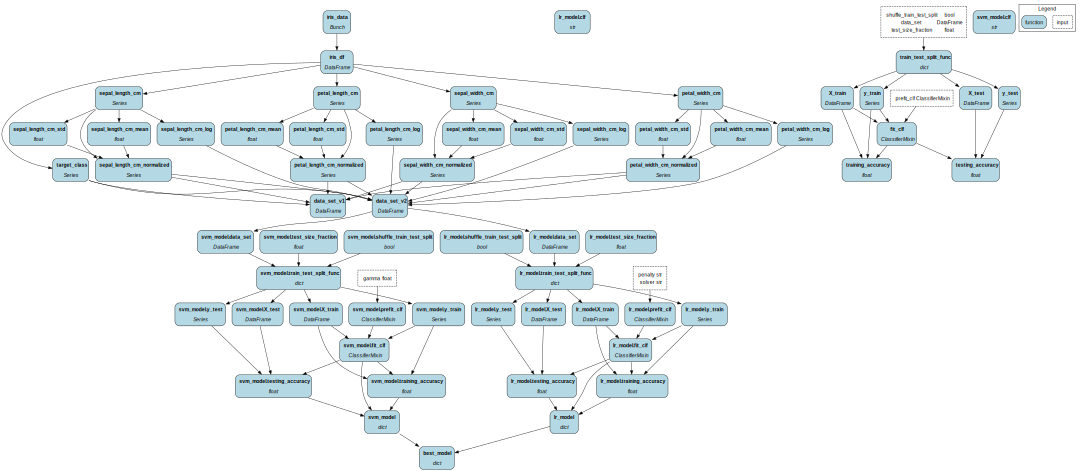

In [18]:
from hamilton import base
dr = driver.Driver(
        {},
        iris_loader,
        feature_transforms,
        model_fitting,
        models,
        username="elijah@dagworks.io",
        api_key=api_key,
        project_id=PROJECT_ID, 
        dag_name="iris_model" + "_" + str(int(random.random()*2)),
        tags={"template": "machine_learning", "iteration" : "1"},
        adapter=base.DefaultAdapter()
    )
dr.display_all_functions(graphviz_kwargs=dict(graph_attr={'size': '15,10'}))

# Executing the DAG

In [19]:
all_possible_outputs = dr.list_available_variables()
desired_features = [
    o.name for o in all_possible_outputs
    if o.tags.get("stage") == "production"]

inputs = {"gamma": random.random(), "penalty": "l2", "solver": "lbfgs"}
result = dr.execute(["best_model"], inputs=inputs)


Capturing execution run. All runs for project can be found at https://app.dagworks.io/dashboard/project/19306/runs

Captured execution run. Results can be found at https://app.dagworks.io/dashboard/project/19306/runs/19370

